<p style="text-align: center;">ANÁLISIS DE LOS DATOS</p>
<p style="text-align: center;">TRANSPORTE PÚBLICO EN ESPAÑA</p>

In [1]:
# Librerías de análisis
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# AB testing
# -----------------------------------------------------------------------
from scipy.stats import ttest_ind, mannwhitneyu, kstest, levene

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

Antes de meterme a analizar la información en profundidad, hay algunos puntos que quiero destacar, ya que van a influir en las decisiones que tome a la hora de ver los datos:

1. La columna <u>Fecha</u> no está bien registrada. Voy a quedarme con los días y los meses pero no con las horas porque es una escala ascedente en formato fecha, pero no son las horas reales de los trenes.
2. La columna <u>Region</u> voy a aislarla del análisis y no la voy a tener en cuenta porque sus valores no tienen sentido a priori y confunden más que aportan.
3. La columna <u>Transporte</u> me genera dudas. Sí puede estar bien recogida y registrada la información en una investigación ficticia pero no en una real, ya que los tranvías y los metros no realizan esas rutas en España. Visto que la distribución de su muestra es bastante uniforme, usaré los datos de manera general o como variable secundaria en determinados análisis, pero no como foco principal de la investigación.

In [2]:
# conjuntos de datos: 
df_tp = pd.read_csv('Transporte_ok.csv')

Partiendo del objetivo de la investigación propuesta, planteo una serie de cuestiones que quiero responder analizando la información. Estas cuestiones serán la base del análisis y contestarlas correctamente será el resultado de la investigación, transformando así la data en información relevante para la toma de decisiones estratégicas.

OBJETIVO: **Identificar áreas de mejora en la eficiencia del transporte y reducir los retrasos**

1. RETRASOS  
    Analizo si existen correlaciones entre el retraso de los viajes y el resto de variables que tenemos en la muestra: Ruta, Transporte, Día de la semana, Origen, Destino y número de pasajeros.


Retrasos medios por ruta:
Ruta
Barcelona - Bilbao      59.060980
Barcelona - Valencia    59.591940
Bilbao - Madrid         59.519085
Madrid - Barcelona      59.178694
Madrid - Malaga         58.849887
Madrid - Zaragoza       59.360241
Malaga - Sevilla        59.010264
Sevilla - Madrid        59.446300
Valencia - Sevilla      59.612851
Zaragoza - Barcelona    59.777678
Name: Retraso_Minutos, dtype: float64

Retrasos medios por tipo de transporte:
Tipo_Transporte
Autobús    59.401996
Metro      59.374744
Tranvía    59.469213
Tren       59.114370
Name: Retraso_Minutos, dtype: float64


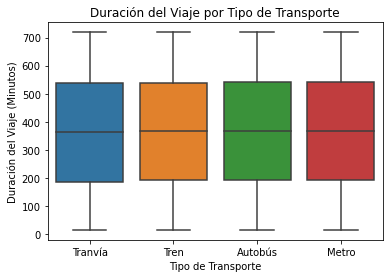


Retrasos medios por dia de la semana:
Dia_Semana
Domingo      59.736458
Jueves       58.934583
Lunes        59.602153
Martes       59.077153
Miércoles    59.117083
Sábado       59.647059
Viernes      59.284444
Name: Retraso_Minutos, dtype: float64


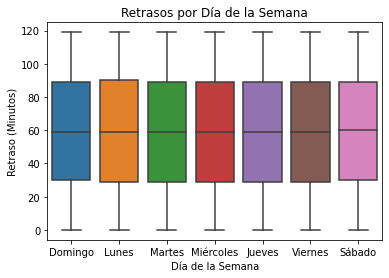


Retrasos medios por Origen:
Origen
Barcelona    59.324984
Bilbao       59.519085
Madrid       59.127877
Malaga       59.010264
Sevilla      59.446300
Valencia     59.612851
Zaragoza     59.777678
Name: Retraso_Minutos, dtype: float64

Retrasos medios por Destino:
Destino
Barcelona    59.480150
Bilbao       59.060980
Madrid       59.483037
Malaga       58.849887
Sevilla      59.310003
Valencia     59.591940
Zaragoza     59.360241
Name: Retraso_Minutos, dtype: float64

Retrasos medios por Numero_Pasajeros:
Numero_Pasajeros
10    61.526168
11    58.166667
12    59.729350
13    60.045905
14    58.368224
15    58.798335
16    59.401467
17    59.258760
18    58.039511
19    58.952336
20    58.476274
21    59.384338
22    60.294836
23    59.765279
24    60.812715
25    60.525755
26    59.593466
27    58.925590
28    59.393862
29    57.716228
30    57.182146
31    58.431321
32    60.253853
33    58.913084
34    59.161654
35    57.824386
36    58.903898
37    59.181738
38    60.508523
39    58

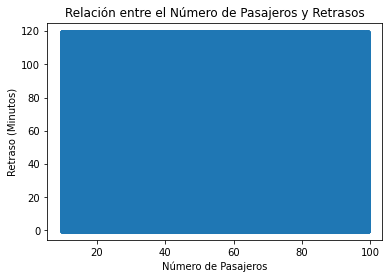

In [3]:
# ¿Existe algún patrón que relacione el retraso y la ruta?
retrasos_por_ruta = df_tp.groupby('Ruta')['Retraso_Minutos'].mean()
print("\nRetrasos medios por ruta:")
print(retrasos_por_ruta)

# ¿Existe algún patrón que relacione el retraso y el tipo de transporte?
retrasos_por_tipo = df_tp.groupby('Tipo_Transporte')['Retraso_Minutos'].mean()
print("\nRetrasos medios por tipo de transporte:")
print(retrasos_por_tipo)

# Gráfico de caja de duración del viaje por tipo de transporte
sns.boxplot(x='Tipo_Transporte', y='Duracion_Viaje_Minutos', data=df_tp)
plt.xlabel('Tipo de Transporte')
plt.ylabel('Duración del Viaje (Minutos)')
plt.title('Duración del Viaje por Tipo de Transporte')
plt.show()

# ¿Existe algún patrón que relacione el retraso y el día de la semana?
retrasos_por_dia = df_tp.groupby('Dia_Semana')['Retraso_Minutos'].mean()
print("\nRetrasos medios por dia de la semana:")
print(retrasos_por_dia)

# Gráfico de caja de retrasos por día de la semana
sns.boxplot(x='Dia_Semana', y='Retraso_Minutos', data=df_tp)
plt.xlabel('Día de la Semana')
plt.ylabel('Retraso (Minutos)')
plt.title('Retrasos por Día de la Semana')
plt.show()

# ¿Existe algún patrón que relacione el retraso y/o el Origen/Destino?
retrasos_por_origen = df_tp.groupby('Origen')['Retraso_Minutos'].mean()
print("\nRetrasos medios por Origen:")
print(retrasos_por_origen)

retrasos_por_destino = df_tp.groupby('Destino')['Retraso_Minutos'].mean()
print("\nRetrasos medios por Destino:")
print(retrasos_por_destino)

# ¿Existe algún patrón que relacione el retraso y el Número de pasajeros?
retrasos_por_np = df_tp.groupby('Numero_Pasajeros')['Retraso_Minutos'].mean()
print("\nRetrasos medios por Numero_Pasajeros:")
print(retrasos_por_np)

# Gráfico de dispersión entre número de pasajeros y retraso
plt.scatter(df_tp['Numero_Pasajeros'], df_tp['Retraso_Minutos'])
plt.xlabel('Número de Pasajeros')
plt.ylabel('Retraso (Minutos)')
plt.title('Relación entre el Número de Pasajeros y Retrasos')
plt.show()

Lo primero que veo es que no existen grandes diferencias en el conjunto de datos al analizar la información. Son datos muy estables y ninguno de estos análisis me arroja luz sobre qué puede estar pasando.No se identifica un patrón claro y concreto, por lo que continúo explorando la información, esta vez abordando el análisis desde otra perspectiva.

2. DURACIÓN DEL VIAJE  
Analizo si existe relación entre la duración del viaje y otras variables que contiene el dataset: Tipo de transporte y Día de la semana

In [4]:
# Duración del viaje por tipo de transporte
duracion_por_tipo = df_tp.groupby('Tipo_Transporte')['Duracion_Viaje_Minutos'].mean()
print("\nDuración media del viaje por tipo de transporte:")
print(duracion_por_tipo)

# Duración del viaje por día de la semana
duracion_por_dia = df_tp.groupby('Dia_Semana')['Duracion_Viaje_Minutos'].mean()
print("\nDuración media del viaje por día de la semana:")
print(duracion_por_dia)



Duración media del viaje por tipo de transporte:
Tipo_Transporte
Autobús    368.498403
Metro      367.825240
Tranvía    364.468814
Tren       366.431033
Name: Duracion_Viaje_Minutos, dtype: float64

Duración media del viaje por día de la semana:
Dia_Semana
Domingo      367.413681
Jueves       367.711667
Lunes        370.119861
Martes       366.440208
Miércoles    367.599306
Sábado       363.410515
Viernes      364.750278
Name: Duracion_Viaje_Minutos, dtype: float64


En cuanto al tipo de transporte, no existen grandes diferencias.
Sin embargo, si puedo señalar que los viajes de los Lunes son ligeramente más largos de media que los del resto de días y que sobre todo hay diferencia entre los Lunes y los Sábados (viajes más largos y más cortos, respectivamente). Decido explotar este dato, profundizar en si, a mayor tiempo de viaje, mayor retraso.
Como en la primera exploración de los datos lo que he visto es que son muy estables y que a primera vista no se aprecian diferencias, decido calcular el porcentaje de retrasos con el objetivo de aproximarme a la información de una forma más fina, con base 100. quizá en este caso sí se aprecien diferencias significativas. 


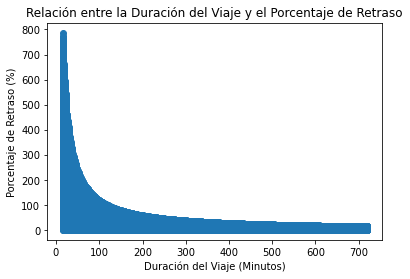

In [5]:
# 'Duracion_Viaje_Minutos' y 'Retraso_Minutos'
df_tp['Porcentaje_Retraso'] = (df_tp['Retraso_Minutos'] / df_tp['Duracion_Viaje_Minutos']) * 100

# Crear el gráfico de dispersión con los valores porcentuales
plt.scatter(df_tp['Duracion_Viaje_Minutos'], df_tp['Porcentaje_Retraso'])
plt.xlabel('Duración del Viaje (Minutos)')
plt.ylabel('Porcentaje de Retraso (%)')
plt.title('Relación entre la Duración del Viaje y el Porcentaje de Retraso')
plt.show()


Lo primero que veo en este gráfico es que sí hay indicios de diferencias. A partir de los 100 minutos de viaje (más o menos), el porcentaje de retraso disminuye. Es decir, puedo concluir que a mayor duración del viaje, menor es el retraso registrado.  

Esto lo observo por la alta concetranción de los puntos en el lado izquierdo del gráfico (duraciones de viaje cortas).
A partir de cierto punto (cercano a los 100 minutos de duración del viaje) vemos una estabilización del retraso y además se mantiene en niveles bajos sin importar cuánto aumenta la duración del viaje. (línea de puntos plana en la parte baja del gráfico).

En resumen, <u>**lo que nos surgiere el gráfico de dispersión es que los viajes más cortos tienen más tendencia a tener mayores retrasos que los viajes largos que son más propensos a la estabilidad y/o los retrasos bajos**</u>

Visto este hallazgo, decido profundizar en él ya que es un hilo interesante del que tirar. Decido dividir la muestra en dos grupos:
- Viajes de menos de 100 minutos
- Viajes de más de 100 minutos
Para entender si existen diferencias significativas entre ambos grupos que me revelen algún patrón.
Creo una columna llamada "grupo" y categorizo la información. Después reviso cómo han quedado los grupos para saber si la muestra está equilibrada y que no se desvirtúen los resultados.

In [6]:
# División en grupos basada en duración del viaje
df_tp['grupo'] = np.where(df_tp['Duracion_Viaje_Minutos'] <= 100, 'Menos_100', 'Mas_100')

# Verifica los grupos creados
print(df_tp['grupo'].value_counts())

Mas_100      88011
Menos_100    11989
Name: grupo, dtype: int64


Las muestras es de los grupos no están balanceadas pero sí podemos utilizarlas para hacer una comparativa. Siempre teniendo en cuenta que la muestra más pequeña (menos de 100) puede mostrar mayor variabilidad.

Repito los análisis, ahora utlizando el dato de los grupos para confirmar el hallazgo.

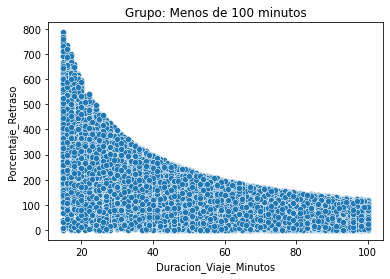

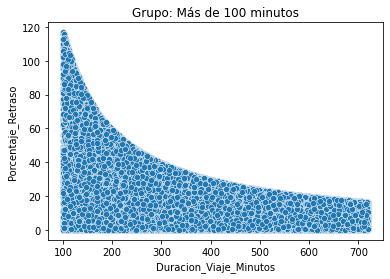

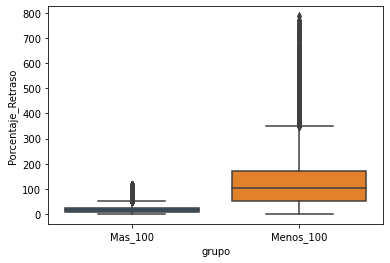

In [7]:
# Gráficos de dispersión por grupo
sns.scatterplot(data=df_tp[df_tp['grupo'] == 'Menos_100'], x='Duracion_Viaje_Minutos', y='Porcentaje_Retraso')
plt.title('Grupo: Menos de 100 minutos')
plt.show()

sns.scatterplot(data=df_tp[df_tp['grupo'] == 'Mas_100'], x='Duracion_Viaje_Minutos', y='Porcentaje_Retraso')
plt.title('Grupo: Más de 100 minutos')
plt.show()

# Gráfico de caja para el porcentaje de retraso por grupo
sns.boxplot(x='grupo', y='Porcentaje_Retraso', data=df_tp)
plt.show()

Los viajes de más de 100 minutos tienden a tener un porcentaje de retraso menor y más concentrado alrededor de la mediana, aunque con algunos casos excepcionales de retrasos muy altos.
Los viajes de menos de 100 minutos, por otro lado, presentan una mayor variabilidad en el porcentaje de retraso, con algunos viajes experimentando retrasos considerables.

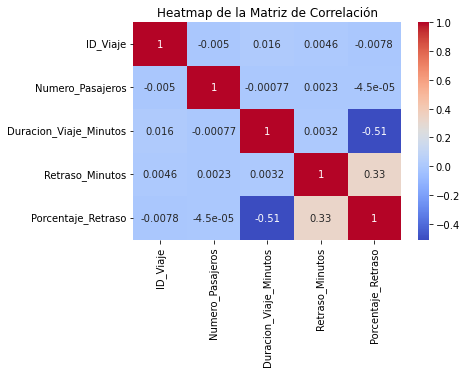

In [8]:
# Matriz de correlación
corr_matrix = df_tp.corr()

# Heatmap de la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

Aquí volvemos a ver cómo Duración de viaje y porcentaje retraso tienen una correlación negativa significativa (Esto vuelve a sugerir que viajes más largos son propensos a menor porcentaje de retraso)

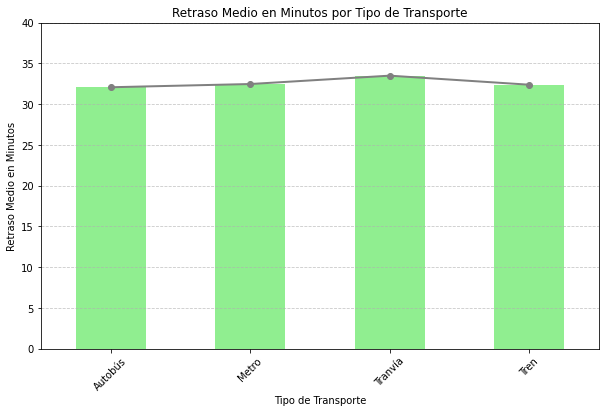

In [9]:
# Agrupo por Tipo de Transporte y calcular la media de Retraso_Minutos
media_retraso = df_tp.groupby('Tipo_Transporte')['Porcentaje_Retraso'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
media_retraso.plot(kind='bar', color='lightgreen')
plt.plot(media_retraso.index, media_retraso.values, marker='o', color='grey', linestyle='-', linewidth=2, markersize=6)
plt.title('Retraso Medio en Minutos por Tipo de Transporte')
plt.xlabel('Tipo de Transporte')
plt.ylabel('Retraso Medio en Minutos')
plt.ylim(0, 40)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

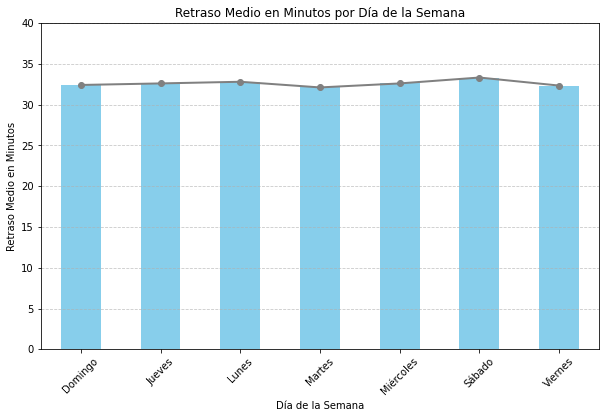

In [10]:
# Agrupo por Dia_Semana y calcular la media de Retraso_Minutos
media_retraso1 = df_tp.groupby('Dia_Semana')['Porcentaje_Retraso'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
media_retraso1.plot(kind='bar', color='skyblue')
plt.plot(media_retraso1.index, media_retraso1.values, marker='o', color='grey', linestyle='-', linewidth=2, markersize=6)
plt.title('Retraso Medio en Minutos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Retraso Medio en Minutos')
plt.ylim(0, 40)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

En ambos análisis vemos ligeras diferencias entre las barras, en el caso de los transportes es el Tranvía el que mayores retrasos registra y en el caso de los días, son los lunes y los sábados los que tienen un % más alto. Sin embargo, tampoco son evidencias reseñables.

### A/B TESTING ###

Decido llevar a cabo con ellos una prueba de **A/B Testing** con el objetivo de determinar estadísticamente si realmente existen diferencias significativas entre los grupos.

H0 (Hipótesis nula)= No existe diferencia en el % de retraso de ambos grupos.
H1 (Hipótesis alternativa)= Sí existe diferencia en el % de retraso de ambos grupos.

Antes de realizar la prueba, reviso la normalidad (con el método <u>**Kolmogorov**</u> debido al gran tamaño de la muestra) y las varianzas con el test de <u>**Levene**</u>. Ambas pruebas determinarán qué método debo usar para realizar el A/B Testing.

In [11]:
# División en grupos basada en duración del viaje
df_tp['grupo'] = np.where(df_tp['Duracion_Viaje_Minutos'] <= 100, 'Menos_100', 'Mas_100')

# Separo los datos en dos grupos para la variable
grupo_menos_100 = df_tp[df_tp['grupo'] == 'Menos_100']['Porcentaje_Retraso']
grupo_mas_100 = df_tp[df_tp['grupo'] == 'Mas_100']['Porcentaje_Retraso']

# Prueba de normalidad Kolmogorov-Smirnov
mean_menos_100, std_menos_100 = np.mean(grupo_menos_100), np.std(grupo_menos_100)
mean_mas_100, std_mas_100 = np.mean(grupo_mas_100), np.std(grupo_mas_100)

print("Prueba de Kolmogorov-Smirnov (Menos_100):")
stat_ks_menos_100, p_value_ks_menos_100 = kstest(grupo_menos_100, 'norm', args=(mean_menos_100, std_menos_100))
print(f"Estadístico de prueba: {stat_ks_menos_100}")
print(f"Valor p: {p_value_ks_menos_100}")

print("\nPrueba de Kolmogorov-Smirnov (Mas_100):")
stat_ks_mas_100, p_value_ks_mas_100 = kstest(grupo_mas_100, 'norm', args=(mean_mas_100, std_mas_100))
print(f"Estadístico de prueba: {stat_ks_mas_100}")
print(f"Valor p: {p_value_ks_mas_100}")

# Prueba de Levene para igualdad de varianzas
stat_levene, p_value_levene = levene(grupo_menos_100, grupo_mas_100)

print("\nPrueba de Levene:")
print(f"Estadístico de prueba: {stat_levene}")
print(f"Valor p: {p_value_levene}")

# Nivel de significancia
alpha = 0.05

if p_value_levene < alpha:
    print("\nLas varianzas no son iguales. Usar la prueba t de Welch.")
    # Prueba t de Welch (no asume varianzas iguales)
    t_statistic, p_value_t = ttest_ind(grupo_menos_100, grupo_mas_100, equal_var=False)
else:
    print("\nLas varianzas son iguales. Usar la prueba t de Student estándar.")
    # Prueba t de Student estándar (asume varianzas iguales)
    t_statistic, p_value_t = ttest_ind(grupo_menos_100, grupo_mas_100, equal_var=True)

# Prueba de Mann-Whitney U (no asume normalidad)
statistic_u, p_value_u = mannwhitneyu(grupo_menos_100, grupo_mas_100)

# Imprimir resultados
print("\nPrueba t de Student:")
print(f"Estadístico de prueba: {t_statistic}")
print(f"Valor p: {p_value_t}")

print("\nPrueba de Mann-Whitney U:")
print(f"Estadístico de prueba: {statistic_u}")
print(f"Valor p: {p_value_u}")

# Interpretación de resultados
if p_value_t < alpha or p_value_u < alpha:
    print("\nExiste una diferencia significativa en el porcentaje de retraso entre los dos grupos (viajes de menos y más de 100 minutos).")
else:
    print("\nNo se ha encontrado evidencia suficiente para afirmar que exista una diferencia significativa en el porcentaje de retraso entre los grupos.")


Prueba de Kolmogorov-Smirnov (Menos_100):
Estadístico de prueba: 0.14181826506966932
Valor p: 7.523457112257223e-211

Prueba de Kolmogorov-Smirnov (Mas_100):
Estadístico de prueba: 0.14449321053559694
Valor p: 0.0

Prueba de Levene:
Estadístico de prueba: 43897.09113809708
Valor p: 0.0

Las varianzas no son iguales. Usar la prueba t de Welch.

Prueba t de Student:
Estadístico de prueba: 103.40578895445258
Valor p: 0.0

Prueba de Mann-Whitney U:
Estadístico de prueba: 954960539.5
Valor p: 0.0

Existe una diferencia significativa en el porcentaje de retraso entre los dos grupos (viajes de menos y más de 100 minutos).


Dado que los valores p de ambas pruebas son significativamente menores que el nivel de significancia (0.05), rechazamos la hipótesis nula en favor de la hipótesis alternativa.

Los resultados sí son determinantes. Lo que hemos hecho aquí es:

Calculo la <u>Normalidad</u>
La prueba de Kolmogorov-Smirnov indica que los datos no siguen una distribución normal para ambos grupos. Esto, además, es consistente con los resultados de la prueba t donde he utilizado la versión Welch debido a la desigualdad entre varianzas.

Calculo las varianzas <u>Varianzas</u>
La prueba de Levene muestra que las varianzas entre los dos grupos son significativamente diferentes.

Debido a la desigualdad de varianzas y que los datos no siguen una distribución normal, realizo la prueba de T de Welch y Mann-whitney para realizar el A/B Testing y ambas concluyen que existen diferencias significativas en el porcentaje de retraso de los grupos. Por tanto, **se refuerza la conclusión de que sí existe diferencia a tener en cuenta en los retrasos entre los viajes de menos de 100 minutos y los viajes de más de 100 minutos.**

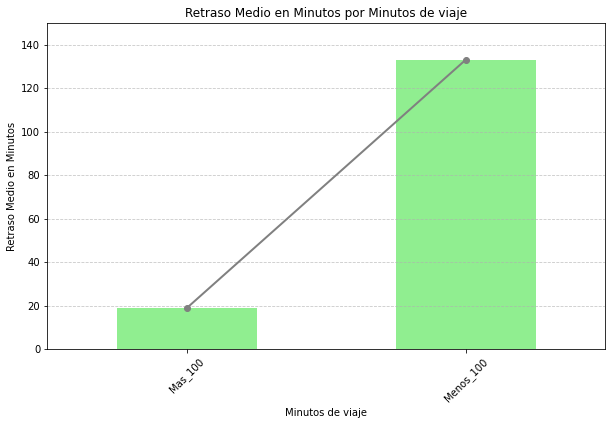

In [12]:
# Agrupo por grupo y calculo la media de Porcentaje de Retraso_Minutos
mean_retraso = df_tp.groupby('grupo')['Porcentaje_Retraso'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
mean_retraso.plot(kind='bar', color='lightgreen')
plt.plot(mean_retraso.index, mean_retraso.values, marker='o', color='grey', linestyle='-', linewidth=2, markersize=6)
plt.title('Retraso Medio en Minutos por Minutos de viaje')
plt.xlabel('Minutos de viaje')
plt.ylabel('Retraso Medio en Minutos')
plt.ylim(0, 150)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Es aquí donde vemos representado gráficamente lo que acabamos de confirmar con el AB Testing. Si existe una diferencia significativa entre ambos grupos por lo que deberíamos entrar a profundizar en ello para entender qué puede estar sucediendo y qué otros factores pueden estar determinando esta situación.

El siguiente paso es entrar a ver los grupos por separado y cruzarlos con otras variables para ver si existen otras correlaciones determinantes.

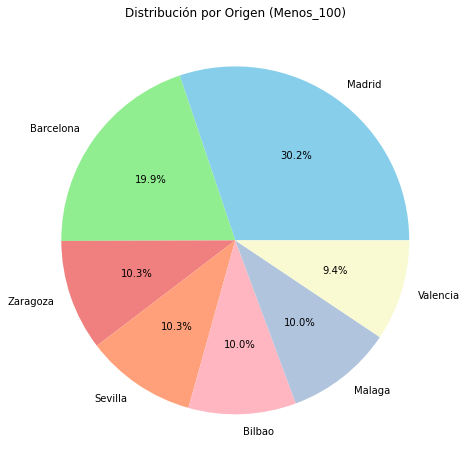

In [13]:
# Incluyo solo los grupos 'Menos_100'
df_filtrado = df_tp[df_tp['grupo'] == 'Menos_100']

# Agrupo por Origen y cuento el número de ocurrencias
transportes = df_filtrado['Origen'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8), facecolor='white')
plt.pie(transportes, labels=transportes.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightsteelblue', 'lightgoldenrodyellow'])
plt.title('Distribución por Origen (Menos_100)')
plt.show()

Lo que vemos si ponemos la lupa sobre el grupo que más retrasos registra, es que, en el 30% de los casos, el tren parte de Madrid. Esto no significa que cuando el origen sea Madrid se registren mayores retrasos, pero al tener mayor muestra, también aumenta la probabilidad y podría ser un hilo del que tirar.

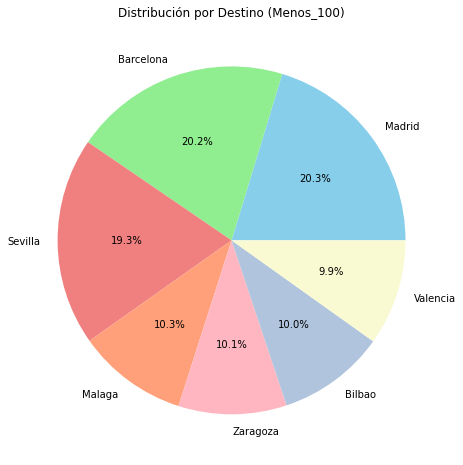

In [14]:
# Filtro el DataFrame para incluir solo los grupos 'Menos_100'
df_filtrado = df_tp[df_tp['grupo'] == 'Menos_100']

# Agrupo por Destino y cuento el número de ocurrencias
transportes = df_filtrado['Destino'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8), facecolor='white')
plt.pie(transportes, labels=transportes.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightsteelblue', 'lightgoldenrodyellow'])
plt.title('Distribución por Destino (Menos_100)')
plt.show()

Lo mismo ocurre si vemos el grupo que más retrasos tiene agrupado por Destino. Vemos que hay mayor muestra de Madrid, Barcelona y Sevilla (En torno al 20%) por lo que deberían ser los primeros Destinos a observar.

In [15]:
# Valores max y min de los retrasos
max_retraso = df_tp['Numero_Pasajeros'].max()
min_retraso = df_tp['Numero_Pasajeros'].min()

print("El máximo Numero_Pasajeros es:", max_retraso)
print("El mínimo Numero_Pasajeros es:", min_retraso)

El máximo Numero_Pasajeros es: 99
El mínimo Numero_Pasajeros es: 10


In [16]:
df_tp.columns

Index(['ID_Viaje', 'Fecha', 'Ruta', 'Numero_Pasajeros',
       'Duracion_Viaje_Minutos', 'Retraso_Minutos', 'Tipo_Transporte',
       'Region', 'Dia_Semana', 'Origen', 'Destino', 'Porcentaje_Retraso',
       'grupo'],
      dtype='object')

Decido ahora estudiar cuál es la relación del Porcentaje de Retraso de los minutos y la Fecha. Como indicaba anteriormente, aislo la hora y los minutos porque no tienen un patrón fiable y me quedo con los días en los que se ha registrado cada viaje, los agrupo en meses y lo cruzo con el retraso de los minutos para ver si, con una línea temporal, hay algún dato interesante o relevante.

In [17]:
# Entendiendo el perído de tiempo analizado Fecha
max_fecha = df_tp['Fecha'].max()
min_fecha = df_tp['Fecha'].min()

print("La fecha más reciente en los datos es:", max_fecha)
print("La fecha más antigua en los datos es:", min_fecha)

La fecha más reciente en los datos es: 2023-03-11 10:39:00
La fecha más antigua en los datos es: 2023-01-01 00:00:00


In [18]:
df_tp.reset_index(inplace=True)

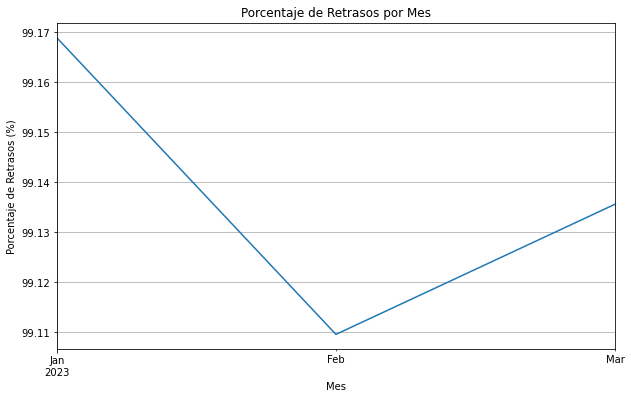

In [19]:
# Convertir la columna 'Fecha' a tipo datetime
df_tp['Fecha'] = pd.to_datetime(df_tp['Fecha'], errors='coerce')

# Establecer 'Fecha' como índice
df_tp.set_index('Fecha', inplace=True)

# Crear una columna booleana que indique si hubo retraso
df_tp['Retraso'] = df_tp['Retraso_Minutos'] > 0

# Agrupar por mes y calcular el porcentaje de retrasos
retrasos_por_mes = df_tp['Retraso'].resample('M').mean() * 100  # Multiplicamos por 100 para obtener el porcentaje

# Crear el gráfico de porcentaje de retrasos por mes
plt.figure(figsize=(10, 6))
retrasos_por_mes.plot()
plt.title('Porcentaje de Retrasos por Mes')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de Retrasos (%)')
plt.grid(True)
plt.show()

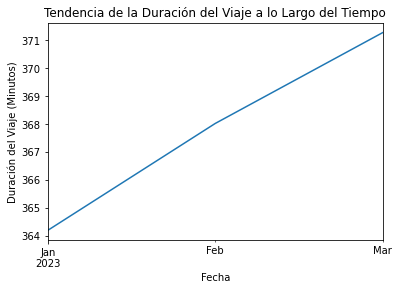

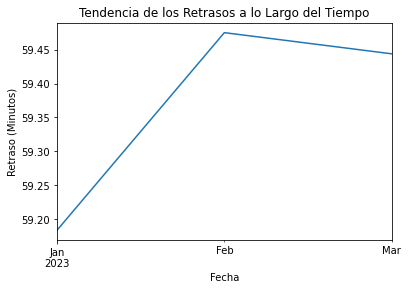

In [20]:
#df_tp.set_index('Fecha', inplace=True)

# Gráfico de la duración del viaje a lo largo del tiempo
df_tp['Duracion_Viaje_Minutos'].resample('M').mean().plot()
plt.title('Tendencia de la Duración del Viaje a lo Largo del Tiempo')
plt.ylabel('Duración del Viaje (Minutos)')
plt.show()

# Gráfico de los retrasos a lo largo del tiempo
df_tp['Retraso_Minutos'].resample('M').mean().plot()
plt.title('Tendencia de los Retrasos a lo Largo del Tiempo')
plt.ylabel('Retraso (Minutos)')
plt.show()

Al agrupar los días en meses sí vemos una representación interesante y relevante. Lo que podemos observar en el gráfico de línea temporal, es que de Enero (que empiezan a registrarse los datos) a Febrero, hay un crecimiento exponencial de los retrasos en viajes y que, en Febrero el fenómeno experimenta una estabilización y continúa hacia Marzo descendiendo ligeramente.

Para entender estos datos, no podemos utilizar únicamente el dataset proporcionado sino que hay que acudir también a fuentes externas. Este resultado podría estar relacionado con:

- Factores climáticos o condiciones meteorológicas adversas: ya que pueden provocar cancelaciones o retrasos en los desplazamientos de transportes. Habría que revisar la meteorología de ese período y cruzar la información con la nuestra para ver si tuvo influencia y puede ser un argumento válido para estar variación.

- Aumento o descenso de la demanda de tickets para viajar: habría que comprobar si en enero había más concentración de retrasos porque hay más movimiento de personas por las vacaciones de navidad.

- Problemas técnicos de las infraestructuras: comprobar si hubo algún fenómeno concreto que afectase a la movilidad nacional (Huelga de trabajadores).

- Cambios en la legislación: si por alguna razón existen restricciones gubernamentales que afectan al normal comportamiento de los transportes (Covid-19).

Como resumen, antes de trasladar el análisis a power bi para diseñar un cuadro de mando que refleje la información más relevante, podemos afirmar qué hemos concluido en este análisis:

1. Los datos son muy estables, si analizamos la totalidad del dataset no hay dispersión (presencia de outliers) y en términos generales no revelan información relevante que refleje qué trayectos son los que más retrasos registran.

2. Si agrupamos la información en grupos más pequeños sí hallamos diferencias significativas entre grupos. En este caso, vemos cómo los trayectos más largos son los más estables y los que registran retrasos en en menor proporción, mientras que los trayectos más cortos presentan un alto porcentaje de retrasos. Estableciendo que los trayectos cortos son aquellos que se realizan en 100 minutos o menos y los trayectos largos los que se realizan en más de 100 minutos.

3. También detectamos que el mes de enero es el que registra más retrasos, Febrero frena y estabiliza y va descendiendo esa situación hasta llegar a Marzo.

4. Señalamos también que las ciudades de orgien y destino de los trayectos pueden ser variables relevantes a la hora de estudiar la situación. Siendo en Origen Madrid la ciudad que mayor porcentaje de trayectos cortos que registra y en Destino Madrid, Barcelona y Sevilla. (Los trayectos cortos son los que mayor porcentaje de retrasos registran).

Por tanto, el siguiente paso sería entender qué factores externos pueden estar afectando a estos 4 puntos que revelan los datos para determinar si existe una correlación entre ellos y por tanto un patrón a estudiar.

En el otro lado de la moneda, sería interesante también estudiar qué factores externos ocurren (o no) en el grupo con el % de retrasos más bajo y hacer una comparativa. De esta forma nos podríamos acercar a identificar los factores clave o influeyentes en esta situación.

In [21]:
# Exportar el DataFrame limpio a un archivo CSV para el análisis y las visualizaciones
df_tp.to_csv('visualizacionestp.csv', index=False)